In [1]:
import librosa as lb
import scipy
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import os
from pylab import plot, show, figure, imshow, xlim, ylim, title
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
#CONSTANTS

DATA_DIR = "smalldata/"
CATEGORY_COUNT = 2


In [3]:


class Instrument:
    def __init__(self, name, audio, mfcc, category):
        self.name = name  
        self.audio = audio  
        self.mfcc = mfcc
        self.category = category

instruments = []
        
i = 0
for folder in os.listdir(DATA_DIR):
    if "." not in folder:
        new_instrument = Instrument(folder, [], [], i)
        print(new_instrument.name, 'started')
        for file_path in os.listdir(DATA_DIR + folder):
            if file_path.endswith(".mp3"):
                try:
                    audio, sr = lb.load(DATA_DIR + folder + "/" + file_path)
                    #audio, sr = lb.core.load(lb.util.example_audio_file())
                    new_instrument.audio.append(audio)
                except:
                    print('Failed to add',folder + "/" + file_path + ' (' + str(len(new_instrument.audio)) + '. ' + new_instrument.name + ').')
        instruments.append(new_instrument)   
        print(new_instrument.name, 'added')
        i+=1
    
print('FINISHED')

banjo started
banjo added
cello started
cello added
FINISHED


In [4]:
for instrument in instruments:
    instrument.mfcc = []
    for audio in instrument.audio:
            mfccs = lb.feature.mfcc(y=audio,n_mfcc=13)
            mfccs = lb.util.normalize(mfccs)
            scipy.linalg.norm(mfccs)
           # mfccs = mfccs / 500
            instrument.mfcc.append(mfccs.mean(axis=1))

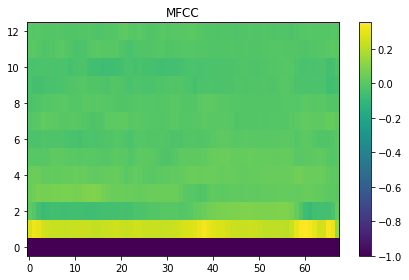

In [5]:
imshow(mfccs, aspect = 'auto', origin='lower', interpolation='none')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [6]:
'''w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
mfcc = MFCC()

for instrument in instruments:
    instrument.mfcc = []
    for audio in instrument.audio:
            mfccs = []
            melbands = []
            melbands_log = []
            for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):
                    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
                    mfccs.append(mfcc_coeffs)
                    melbands.append(mfcc_bands)
            mfccs = essentia.array(mfccs).mean(axis=0)
            mfccs = mfccs / 500
            instrument.mfcc.append(mfccs)
   # melbands_log.append(logNorm(mfcc_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)

melbands = essentia.array(melbands).T
melbands_log = essentia.array(melbands_log).T

# and plot
imshow(melbands[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel band spectral energies in frames")
show()

#imshow(melbands_log[:,:], aspect = 'auto', origin='lower', interpolation='none')
#plt.title("Log-normalized mel band spectral energies in frames")
#show()

#imshow(mfccs[1:,:], aspect='auto', origin='lower', interpolation='none')
#plt.title("MFCCs in frames")
#show()'''

'w = Windowing(type = \'hann\')\nspectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum\nmfcc = MFCC()\n\nfor instrument in instruments:\n    instrument.mfcc = []\n    for audio in instrument.audio:\n            mfccs = []\n            melbands = []\n            melbands_log = []\n            for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):\n                    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))\n                    mfccs.append(mfcc_coeffs)\n                    melbands.append(mfcc_bands)\n            mfccs = essentia.array(mfccs).mean(axis=0)\n            mfccs = mfccs / 500\n            instrument.mfcc.append(mfccs)\n   # melbands_log.append(logNorm(mfcc_bands))\n\n# transpose to have it in a better shape\n# we need to convert the list to an essentia.array first (== numpy.array of floats)\n\nmelbands = essentia.array(melbands).T\nmelbands_log = essentia.array(melbands_log).T\n\n# and p

In [7]:
mfccs.shape

(13, 68)

In [8]:

for instrument in instruments:
    print(len(instrument.mfcc))

4
20


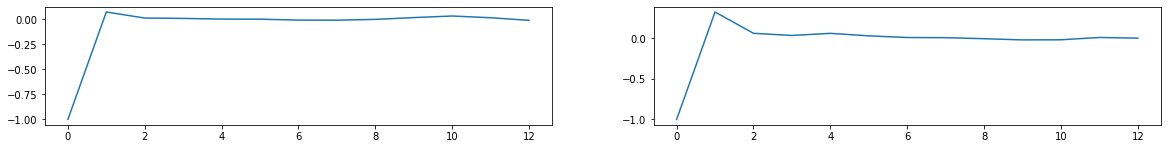

In [9]:

fig = plt.figure(figsize=(20,10))
i = 0
for instrument in instruments:
    i += 1
    fig.add_subplot(4,2,i)
    plot(instrument.mfcc[3])
    #ylim(-1,1)
show()

In [10]:
X = []
y = []

for instrument in instruments:
    i = 0
    for mfcc in instrument.mfcc:
        i += 1
        X.append(mfcc)
        y.append(instrument.category)

X = np.array(X) 
print(X.shape)
X = X.astype('float32')
y = np.array(y)

print(len(X))
print(len(X[0]))
print(X.shape)
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

(24, 13)
24
13
(24, 13)


In [11]:



print(len(X_train))
print(len(y_train))
print(y_train[1])
y_train = np_utils.to_categorical(y_train,CATEGORY_COUNT)
y_test = np_utils.to_categorical(y_test,CATEGORY_COUNT)
print(len(X_train))
print(X_train.shape)

18
18
0
18
(18, 13)


In [12]:
model = models.Sequential()
#model.add(layers.Conv2D(filters=8,kernel_size=(3,3), input_shape=(3411,13,1),activation='relu'))
#model.add(layers.AveragePooling2D())
#model.add(layers.Conv2D(filters=16,kernel_size=(3,3), activation='relu'))
#model.add(layers.AveragePooling2D())
#model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=CATEGORY_COUNT, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
y_train.dtype

dtype('float32')

In [14]:

history = model.fit(X_train, y_train, epochs=70, batch_size=128) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/70
18/18 [==============================] - 1s 36ms/step - loss: 0.6714 - acc: 0.8333
Epoch 2/70
18/18 [==============================] - 0s 167us/step - loss: 0.6381 - acc: 0.8333
Epoch 3/70
18/18 [==============================] - 0s 222us/step - loss: 0.6061 - acc: 0.8333
Epoch 4/70
18/18 [==============================] - 0s 278us/step - loss: 0.5760 - acc: 0.8333
Epoch 5/70
18/18 [==============================] - 0s 220us/step - loss: 0.5485 - acc: 0.8333
Epoch 6/70
18/18 [==============================] - 0s 278us/step - loss: 0.5208 - acc: 0.8333
Epoch 7/70
18/18 [==============================] - 0s 221us/step - loss: 0.4943 - acc: 0.8333
Epoch 8/70
18/18 [==============================] - 0s 278us/step - loss: 0.4698 - acc: 0.8333
Epoch 9/70
18/18 [==============================] - 0s 333us/step - loss: 0.4483 - acc: 0.8333
Epoch 10/70
18/18 [==============================] - 0s 278us/step - loss: 0.4313 - acc: 0.8333
Ep

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               7168      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 164,398
Trainable params: 164,398
Non-trainable params: 0
_________________________________________________________________


In [16]:
loss, acc = model.evaluate(X_test, y_test)
print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

6/6 [==============================] - 0s 5ms/step
Test loss: 0.019884534180164337
Test accuracy: 100.00%


In [17]:
new = model.predict_classes(X)
for i in range(len(X)):
	print("Predicted=%s" % ( new[i]))

Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
